
Introduction to PyTorch 
========================

Below contents are taken from PyTorch tutorials.

Tensors are the central data abstraction in PyTorch.

First things first, let’s import the PyTorch module.

In [1]:
import torch

Creating Tensors
----------------

The simplest way to create a tensor is with the ``torch.empty()`` call:




In [2]:
x = torch.empty(3, 4)
print(type(x))
print(x)

<class 'torch.Tensor'>
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


Let’s unpack what we just did:

-  We created a tensor using one of the numerous factory methods
   attached to the ``torch`` module.
-  The tensor itself is 2-dimensional, having 3 rows and 4 columns.
-  The type of the object returned is ``torch.Tensor``, which is an
   alias for ``torch.FloatTensor``; by default, PyTorch tensors are
   populated with 32-bit floating point numbers. (More on data types
   below.)
-  You will probably see some random-looking values when printing your
   tensor. The ``torch.empty()`` call allocates memory for the tensor,
   but does not initialize it with any values - so what you’re seeing is
   whatever was in memory at the time of allocation.

A brief note about tensors and their number of dimensions, and
terminology:

-  You will sometimes see a 1-dimensional tensor called a
   *vector.* 
-  Likewise, a 2-dimensional tensor is often referred to as a
   *matrix.* 
-  Anything with more than two dimensions is generally just
   called a tensor.

More often than not, you’ll want to initialize your tensor with some
value. Common cases are all zeros, all ones, or random values, and the
``torch`` module provides factory methods for all of these:




In [6]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

random = torch.rand(2, 3)
print(random)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0.3615, 0.8562, 0.5153],
        [0.2048, 0.8640, 0.0635]])


The factory methods all do just what you’d expect - we have a tensor
full of zeros, another full of ones, and another with random values
between 0 and 1.

Random Tensors and Seeding
~~~~~~~~~~~~~~~~~~~~~~~~~~



In [8]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])


What you should see above is that ``random1`` and ``random3`` carry
identical values. Manually setting
the RNG’s seed resets it, so that identical computations depending on
random number should, in most settings, provide identical results.

The last way to create a tensor that will cover is to specify its data
directly from a PyTorch collection:

In [9]:
some_constants = torch.tensor([[3.1415926, 2.71828], [1.61803, 0.0072897]])
print(some_constants)

some_integers = torch.tensor((2, 3, 5, 7, 11, 13, 17, 19))
print(some_integers)

more_integers = torch.tensor(((2, 4, 6), [3, 6, 9]))
print(more_integers)

tensor([[3.1416, 2.7183],
        [1.6180, 0.0073]])
tensor([ 2,  3,  5,  7, 11, 13, 17, 19])
tensor([[2, 4, 6],
        [3, 6, 9]])


Using ``torch.tensor()`` is the most straightforward way to create a
tensor if you already have data in a Python tuple or list. As shown
above, nesting the collections will result in a multi-dimensional
tensor.

Tensor Data Types

Setting the datatype of a tensor is possible a couple of ways:

In [10]:
a = torch.ones((2, 3), dtype=torch.int16)
print(a)

b = torch.rand((2, 3), dtype=torch.float64) * 20.
print(b)

c = b.to(torch.int32)
print(c)

tensor([[1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)
tensor([[17.3151, 14.5980,  6.0404],
        [18.0429,  7.2532, 19.6519]], dtype=torch.float64)
tensor([[17, 14,  6],
        [18,  7, 19]], dtype=torch.int32)


The simplest way to set the underlying data type of a tensor is with an
optional argument at creation time. In the first line of the cell above,
we set ``dtype=torch.int16`` for the tensor ``a``. When we print ``a``,
we can see that it’s full of ``1`` rather than ``1.`` - Python’s subtle
cue that this is an integer type rather than floating point.

Another thing to notice about printing ``a`` is that, unlike when we
left ``dtype`` as the default (32-bit floating point), printing the
tensor also specifies its ``dtype``.

The other way to set the datatype is with the ``.to()`` method. In the
cell above, we create a random floating point tensor ``b`` in the usual
way. Following that, we create ``c`` by converting ``b`` to a 32-bit
integer with the ``.to()`` method. Note that ``c`` contains all the same
values as ``b``, but truncated to integers.

Available data types include:

-  ``torch.bool``
-  ``torch.int8``
-  ``torch.uint8``
-  ``torch.int16``
-  ``torch.int32``
-  ``torch.int64``
-  ``torch.half``
-  ``torch.float``
-  ``torch.double``

Math & Logic with PyTorch Tensors
---------------------------------

Now that you know some of the ways to create a tensor… what can you do
with them?

Let’s look at basic arithmetic first, and how tensors interact with
simple scalars:




In [12]:
ones = torch.zeros(2, 2) + 1
twos = torch.ones(2, 2) * 2
threes = (torch.ones(2, 2) * 7 - 1) / 2
fours = twos ** 2
sqrt2s = twos ** 0.5

print(ones)
print(twos)
print(threes)
print(fours)
print(sqrt2s)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
tensor([[4., 4.],
        [4., 4.]])
tensor([[1.4142, 1.4142],
        [1.4142, 1.4142]])


As you can see above, arithmetic operations between tensors and scalars,
such as addition, subtraction, multiplication, division, and
exponentiation are distributed over every element of the tensor. Because
the output of such an operation will be a tensor, you can chain them
together with the usual operator precedence rules, as in the line where
we create ``threes``.

Similar operations between two tensors also behave like you’d
intuitively expect:




In [14]:
powers2 = twos ** torch.tensor([[1, 2], [3, 4]])
print(powers2)

fives = ones + fours
print(fives)

dozens = threes * fours
print(dozens)

tensor([[ 2.,  4.],
        [ 8., 16.]])
tensor([[5., 5.],
        [5., 5.]])
tensor([[12., 12.],
        [12., 12.]])


It’s important to note here that all of the tensors in the previous code
cell were of identical shape. What happens when we try to perform a
binary operation on tensors if dissimilar shape?


   




In [15]:
a = torch.rand(2, 3)
b = torch.rand(3, 2)

print(a * b)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In the general case, you cannot operate on tensors of different shape
this way (element-wise), even in a case like the cell above, where the tensors have an
identical number of elements.



In [16]:
print(a @ b)

tensor([[0.4518, 0.7276],
        [0.4494, 0.6302]])


For matrix multiplication, you should use '@' instead of '*'

In [20]:
rand = torch.rand(2, 4)
doubled = rand * (torch.ones(1, 4) * 2)

print(rand)
print(doubled)

tensor([[0.0703, 0.5105, 0.9451, 0.2359],
        [0.1979, 0.3327, 0.6146, 0.5999]])
tensor([[0.1405, 1.0210, 1.8901, 0.4717],
        [0.3959, 0.6655, 1.2291, 1.1998]])


What’s the trick here? How is it we got to multiply a 2x4 tensor by a
1x4 tensor?

Broadcasting is a way to perform an operation between tensors that have
similarities in their shapes. In the example above, the one-row,
four-column tensor is multiplied by *both rows* of the two-row,
four-column tensor.

This is an important operation in Deep Learning. The common example is
multiplying a tensor of learning weights by a *batch* of input tensors,
applying the operation to each instance in the batch separately, and
returning a tensor of identical shape - just like our (2, 4) \* (1, 4)
example above returned a tensor of shape (2, 4).

The rules for broadcasting are:

-  Each tensor must have at least one dimension - no empty tensors.

-  Comparing the dimension sizes of the two tensors, *going from last to
   first:*

   -  Each dimension must be equal, *or*

   -  One of the dimensions must be of size 1, *or*

   -  The dimension does not exist in one of the tensors

Tensors of identical shape, of course, are trivially “broadcastable”, as
you saw earlier.

Here are some examples of situations that honor the above rules and
allow broadcasting:




In [17]:
a = torch.ones(4, 3, 2)

b = a * torch.rand(1, 3, 2) # 3rd & 2nd dims identical to a, dim 1 absent
print(b, b.size())

c = a * torch.rand(3, 1) # 3rd dim = 1, 2nd dim identical to a
print(c, c.size())

d = a * torch.rand(1, 2) # 3rd dim identical to a, 2nd dim = 1
print(d, d.size())

tensor([[[0.0703, 0.5105],
         [0.9451, 0.2359],
         [0.1979, 0.3327]],

        [[0.0703, 0.5105],
         [0.9451, 0.2359],
         [0.1979, 0.3327]],

        [[0.0703, 0.5105],
         [0.9451, 0.2359],
         [0.1979, 0.3327]],

        [[0.0703, 0.5105],
         [0.9451, 0.2359],
         [0.1979, 0.3327]]]) torch.Size([4, 3, 2])
tensor([[[0.6146, 0.6146],
         [0.5999, 0.5999],
         [0.5013, 0.5013]],

        [[0.6146, 0.6146],
         [0.5999, 0.5999],
         [0.5013, 0.5013]],

        [[0.6146, 0.6146],
         [0.5999, 0.5999],
         [0.5013, 0.5013]],

        [[0.6146, 0.6146],
         [0.5999, 0.5999],
         [0.5013, 0.5013]]]) torch.Size([4, 3, 2])
tensor([[[0.9397, 0.8656],
         [0.9397, 0.8656],
         [0.9397, 0.8656]],

        [[0.9397, 0.8656],
         [0.9397, 0.8656],
         [0.9397, 0.8656]],

        [[0.9397, 0.8656],
         [0.9397, 0.8656],
         [0.9397, 0.8656]],

        [[0.9397, 0.8656],
         [0.9397

Look closely at the values of each tensor above: 
For (layer, rwo, column)

-  The multiplication operation that created ``b`` was 
   broadcast over every “layer” of ``a``.
-  For ``c``, the operation was broadcast over ever layer and row of
   ``a`` - every 3-element column is identical. 
-  For ``d``, we switched it around - now every *row* is identical,
   across layers and columns.


More Math with Tensors
~~~~~~~~~~~~~~~~~~~~~~

PyTorch tensors have over three hundred operations that can be performed
on them.

Here is a small sample from some of the major categories of operations:



In [22]:
import math

In [18]:
# common functions
a = torch.rand(2, 4) * 2 - 1
print('Common functions:')
print(torch.abs(a))
print(torch.ceil(a))
print(torch.floor(a))

# trigonometric functions and their inverses
angles = torch.tensor([0, math.pi / 4, math.pi / 2, 3 * math.pi / 4])
sines = torch.sin(angles)
inverses = torch.asin(sines)
print('\nSine and arcsine:')
print(angles)
print(sines)
print(inverses)

# bitwise operations
print('\nBitwise XOR:')
b = torch.tensor([1, 5, 11])
c = torch.tensor([2, 7, 10])
print(torch.bitwise_xor(b, c))

# comparisons:
print('\nBroadcasted, element-wise equality comparison:')
d = torch.tensor([[1., 2.], [3., 4.]])
e = torch.ones(1, 2)  # many comparison ops support broadcasting!
print(torch.eq(d, e)) # returns a tensor of type bool

# reductions:
print('\nReduction ops:')
print(torch.max(d))        # returns a single-element tensor
print(torch.mean(d))       # average
print(torch.std(d))        # standard deviation
print(torch.prod(d))       # product of all numbers
print(torch.unique(torch.tensor([1, 2, 1, 2, 1, 2]))) # filter unique elements

# vector and linear algebra operations
m1 = torch.rand(2, 2)                   # random matrix
m2 = torch.tensor([[3., 0.], [0., 3.]]) # three times identity matrix

print('\nMatrices:')
print(m1)
m3 = torch.matmul(m1, m2)  # torch.mm
print(m3)                  # 3 times m1
print(torch.svd(m3))       # singular value decomposition

Common functions:
tensor([[0.0413, 0.3730, 0.2772, 0.2987],
        [0.4734, 0.0476, 0.8904, 0.5951]])
tensor([[1., 1., -0., 1.],
        [-0., -0., -0., -0.]])
tensor([[ 0.,  0., -1.,  0.],
        [-1., -1., -1., -1.]])


NameError: name 'math' is not defined


Autograd
============================

PyTorch’s *Autograd* feature is part of what make PyTorch flexible and
fast for building machine learning projects. It allows for the rapid and
easy computation of multiple partial derivatives (also referred to as
*gradients)* over a complex computation. This operation is central to
backpropagation-based neural network learning.

The power of autograd comes from the fact that it traces your
computation dynamically *at runtime,* meaning that if your model has
decision branches, or loops whose lengths are not known until runtime,
the computation will still be traced correctly, and you’ll get correct
gradients to drive learning. This, combined with the fact that your
models are built in Python, offers far more flexibility than frameworks
that rely on static analysis of a more rigidly-structured model for
computing gradients.




A Simple Example
----------------

That was a lot of theory - but what does it look like to use autograd in
practice?

Let’s start with a straightforward example. First, we’ll do some imports
to let us graph our results:




In [19]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

Next, we’ll create an input tensor full of evenly spaced values on the
interval $[0, 2{\pi}]$, and specify ``requires_grad=True``. (Like
most functions that create tensors, ``torch.linspace()`` accepts an
optional ``requires_grad`` option.) Setting this flag means that in
every computation that follows, autograd will be accumulating the
history of the computation in the output tensors of that computation.




In [20]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


Next, we’ll perform a computation, and plot its output in terms of its
inputs:




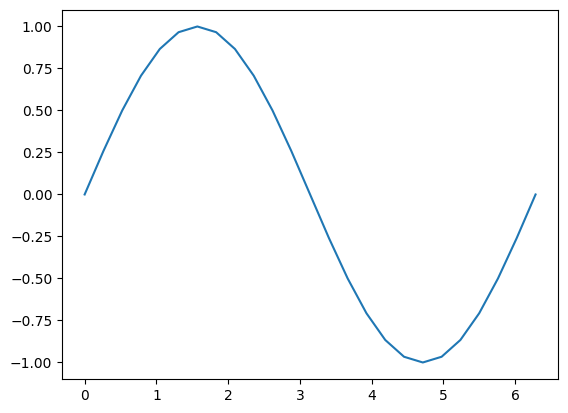

In [21]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

Let’s have a closer look at the tensor ``b``. When we print it, we see
an indicator that it is tracking its computation history:




In [22]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


This ``grad_fn`` gives us a hint that when we execute the
backpropagation step and compute gradients, we’ll need to compute the
derivative of $sin(x)$ for all this tensor’s inputs.

Let’s perform some more computations:




In [23]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Finally, let’s compute a single-element output. When you call
``.backward()`` on a tensor with no arguments, it expects the calling
tensor to contain only a single element, as is the case when computing a
loss function.




In [24]:
# out = (sin(a) * 2 + 1).sum()
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


Each ``grad_fn`` stored with our tensors allows you to walk the
computation all the way back to its inputs with its ``next_functions``
property. We can see below that drilling down on this property on ``d``
shows us the gradient functions for all the prior tensors. Note that
``a.grad_fn`` is reported as ``None``, indicating that this was an input
to the function with no history of its own.




In [31]:
# d = sin(a) * 2 + 1
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions[0][0])
print(d.grad_fn.next_functions[0][0].next_functions[0][0])
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0])
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)

# c = sin(a) * 2
print('\nc:')
print(c.grad_fn)

# b = sin(a)
print('\nb:')
print(b.grad_fn)


print('\na:')
print(a.grad_fn)

d:
()

c:

b:

a:
None


With all this machinery in place, how do we get derivatives out? You
call the ``backward()`` method on the output, and check the input’s
``grad`` property to inspect the gradients:




tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


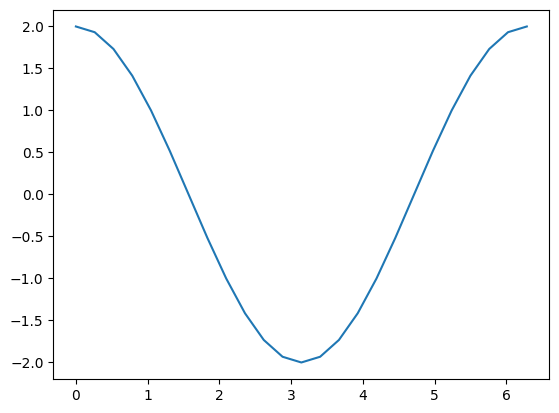

In [38]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

Recall the computation steps we took to get here:

```

   a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
   b = torch.sin(a)
   c = 2 * b
   d = c + 1
   out = d.sum()
```

Adding a constant, as we did to compute ``d``, does not change the
derivative. That leaves $c = 2 * b = 2 * sin(a)$, the derivative
of which should be $2 * cos(a)$. Looking at the graph above,
that’s just what we see.

Be aware than only *leaf nodes* of the computation have their gradients
computed. If you tried, for example, ``print(c.grad)`` you’d get back
``None``. In this simple example, only the input is a leaf node, so only
it has gradients computed.

In [13]:
print(c.grad)

None


/var/folders/s6/yqpth6w93j5d3mshrxfc32pw0000gn/T/ipykernel_20142/3425888651.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525849783/work/build/aten/src/ATen/core/TensorBody.h:485.)
  print(c.grad)


Building Models with PyTorch
============================

``torch.nn.Module`` and ``torch.nn.Parameter``
----------------------------------------------

``torch.nn.Module`` is the PyTorch base class meant
to encapsulate behaviors specific to PyTorch Models and their
components.

One important behavior of ``torch.nn.Module`` is registering parameters.
If a particular ``Module`` subclass has learning weights, these weights
are expressed as instances of ``torch.nn.Parameter``. The ``Parameter``
class is a subclass of ``torch.Tensor``, with the special behavior that
when they are assigned as attributes of a ``Module``, they are added to
the list of that modules parameters. These parameters may be accessed
through the ``parameters()`` method on the ``Module`` class.

As a simple example, here’s a very simple model with two linear layers
and an activation function. We’ll create an instance of it and ask it to
report on its parameters:




In [16]:
import torch

class TinyModel(torch.nn.Module):
    
    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.linear1 = torch.nn.Linear(100, 200)
        self.activation = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(200, 10)
        self.softmax = torch.nn.Softmax()
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.softmax(x)
        return x

tinymodel = TinyModel()

print('The model:')
print(tinymodel)

print('\n\nJust one layer:')
print(tinymodel.linear2)

print('\n\nModel params:')
for name, param in tinymodel.named_parameters():
    print(name, param.size())

print('\n\nLayer params:')
for param in tinymodel.linear2.parameters():
    print(param)

The model:
TinyModel(
  (linear1): Linear(in_features=100, out_features=200, bias=True)
  (activation): ReLU()
  (linear2): Linear(in_features=200, out_features=10, bias=True)
  (softmax): Softmax(dim=None)
)


Just one layer:
Linear(in_features=200, out_features=10, bias=True)


Model params:
linear1.weight torch.Size([200, 100])
linear1.bias torch.Size([200])
linear2.weight torch.Size([10, 200])
linear2.bias torch.Size([10])


Layer params:
Parameter containing:
tensor([[-0.0569, -0.0149, -0.0570,  ..., -0.0580,  0.0173,  0.0384],
        [ 0.0461, -0.0352, -0.0688,  ...,  0.0234, -0.0590, -0.0442],
        [ 0.0644, -0.0121, -0.0230,  ...,  0.0022,  0.0334, -0.0081],
        ...,
        [ 0.0630,  0.0589, -0.0343,  ...,  0.0355, -0.0558,  0.0173],
        [-0.0115, -0.0556, -0.0164,  ..., -0.0494, -0.0416, -0.0285],
        [-0.0606, -0.0218,  0.0501,  ..., -0.0519, -0.0179,  0.0639]],
       requires_grad=True)
Parameter containing:
tensor([-0.0453, -0.0434,  0.0570, -0.0346, -0.0

This shows the fundamental structure of a PyTorch model: there is an
``__init__()`` method that defines the layers and other components of a
model, and a ``forward()`` method where the computation gets done. Note
that we can print the model, or any of its submodules, to learn about
its structure.


Other Resources
---------------

-  Docs on the `data
   utilities <https://pytorch.org/docs/stable/data.html>`__, including
   Dataset and DataLoader, at pytorch.org
-  A `note on the use of pinned
   memory <https://pytorch.org/docs/stable/notes/cuda.html#cuda-memory-pinning>`__
   for GPU training
-  Documentation on the datasets available in
   `TorchVision <https://pytorch.org/vision/stable/datasets.html>`__,
   `TorchText <https://pytorch.org/text/stable/datasets.html>`__, and
   `TorchAudio <https://pytorch.org/audio/stable/datasets.html>`__
-  Documentation on the `loss
   functions <https://pytorch.org/docs/stable/nn.html#loss-functions>`__
   available in PyTorch
-  Documentation on the `torch.optim
   package <https://pytorch.org/docs/stable/optim.html>`__, which
   includes optimizers and related tools, such as learning rate
   scheduling
-  A detailed `tutorial on saving and loading
   models <https://pytorch.org/tutorials/beginner/saving_loading_models.html>`__
-  The `Tutorials section of
   pytorch.org <https://pytorch.org/tutorials/>`__ contains tutorials on
   a broad variety of training tasks, including classification in
   different domains, generative adversarial networks, reinforcement
   learning, and more 


